**Project File 2 - Feature Selection**

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final players df.csv')

In [ ]:
df.head()

,position,champion,result,kills,deaths,assists,teamkills,teamdeaths,firstblood,firstbloodkill,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,top,Gnar,1,3,1,6,20,4,0.0,0.0,...,111.0,724.0,771.0,-4.0,2.0,0.0,0.0,0.0,0.0,2.0
1,jng,Elise,1,4,1,5,20,4,0.0,0.0,...,99.0,338.0,-3.0,-6.0,2.0,1.0,0.0,1.0,0.0,0.0
2,mid,Ryze,1,3,2,8,20,4,0.0,0.0,...,132.0,410.0,-32.0,10.0,0.0,1.0,1.0,0.0,1.0,0.0
3,bot,Lucian,1,9,0,9,20,4,0.0,0.0,...,119.0,1174.0,1234.0,13.0,1.0,2.0,0.0,0.0,0.0,2.0
4,sup,Nami,1,1,0,17,20,4,0.0,0.0,...,5.0,530.0,-47.0,-3.0,0.0,3.0,0.0,0.0,0.0,1.0


Lets preprocess the data for feature selection

In [ ]:
df.describe()

,result,kills,deaths,assists,teamkills,teamdeaths,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
count,108020.000000,108020.000000,108020.000000,108020.000000,108020.000000,108020.000000,108020.000000,108020.000000,108020.000000,108020.000000,...,108020.000000,108020.000000,108020.00000,108020.000000,108020.000000,108020.000000,108020.000000,108020.000000,108020.000000,108020.000000
mean,0.499954,2.613636,2.619080,6.112757,13.068182,13.095399,0.246417,0.100000,0.146417,0.100000,...,103.002759,0.000000,0.00000,0.000000,0.712914,1.237447,0.714692,0.712914,1.237447,0.714692
std,0.500002,2.557194,1.863955,4.300559,6.947212,6.945406,0.430926,0.300001,0.353526,0.300001,...,45.960387,930.479849,752.30592,23.592527,1.013386,1.444014,0.888294,1.013386,1.444014,0.888294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5448.000000,-5063.00000,-155.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,3.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,...,86.000000,-524.000000,-455.00000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,2.000000,5.000000,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000,...,119.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,4.000000,4.000000,9.000000,18.000000,18.000000,0.000000,0.000000,0.000000,0.000000,...,138.000000,524.000000,455.00000,10.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,1.000000,22.000000,15.000000,31.000000,45.000000,45.000000,1.000000,1.000000,1.000000,1.000000,...,192.000000,5448.000000,5063.00000,155.000000,13.000000,14.000000,8.000000,13.000000,14.000000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108020 entries, 0 to 108019
Data columns (total 65 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   position                  108020 non-null  object 
 1   champion                  108020 non-null  object 
 2   result                    108020 non-null  int64  
 3   kills                     108020 non-null  int64  
 4   deaths                    108020 non-null  int64  
 5   assists                   108020 non-null  int64  
 6   teamkills                 108020 non-null  int64  
 7   teamdeaths                108020 non-null  int64  
 8   firstblood                108020 non-null  float64
 9   firstbloodkill            108020 non-null  float64
 10  firstbloodassist          108020 non-null  float64
 11  firstbloodvictim          108020 non-null  float64
 12  team kpm                  108020 non-null  float64
 13  ckpm                      108020 non-null  f

Dropping Position and Champion column for now, we will focus on our binary classification without these two column

In [ ]:
df.drop(columns=['position', 'champion'], inplace=True)

In [ ]:
df.isna().sum()

,0
result,0
kills,0
deaths,0
assists,0
teamkills,0
teamdeaths,0
firstblood,0
firstbloodkill,0
firstbloodassist,0
firstbloodvictim,0


#Feature Selection

##Correlation Matrix

First, we will try to imply Pearson (default) Correlation matrix to find out the results

In [ ]:
correlation_matrix = df.corr()

In [ ]:
correlation_matrix

,result,kills,deaths,assists,teamkills,teamdeaths,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
result,1.000000,0.377600,-0.517041,0.566889,0.694952,-0.693797,0.139435,0.080386,0.101747,-0.080386,...,-0.031442,0.326570,0.250529,0.122550,0.148706,0.183684,-0.169623,-0.148813,-0.183756,0.169501
kills,0.377600,1.000000,-0.191035,0.114644,0.543347,-0.133307,0.119591,0.216386,-0.037851,-0.071119,...,0.310997,0.348419,0.232375,0.142137,0.566250,0.018572,-0.063127,0.056567,-0.100137,0.217263
deaths,-0.517041,-0.191035,1.000000,-0.150274,-0.182838,0.745233,-0.084893,-0.051890,-0.059446,0.232119,...,-0.095772,-0.306657,-0.268236,-0.114779,-0.040486,0.007791,0.605097,0.276289,0.368328,0.022714
assists,0.566889,0.114644,-0.150274,1.000000,0.767686,-0.222408,0.176471,0.014380,0.202905,-0.051721,...,-0.299562,0.186255,0.154747,0.014265,0.063339,0.519261,-0.031176,-0.079767,0.036085,0.276574
teamkills,0.694952,0.543347,-0.182838,0.767686,1.000000,-0.245344,0.135401,0.081817,0.095616,-0.081817,...,-0.047073,0.306575,0.239894,0.096295,0.302491,0.369554,-0.031513,-0.028008,-0.042503,0.345309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
assistsat15,0.183684,0.018572,0.007791,0.519261,0.369554,-0.041809,0.254308,-0.015000,0.322715,-0.035258,...,-0.280615,0.181045,0.168665,0.003688,0.132996,1.000000,0.131295,0.057864,0.207539,0.526440
deathsat15,-0.169623,-0.063127,0.605097,-0.031176,-0.031513,0.345858,-0.066137,-0.032207,-0.053286,0.364480,...,-0.085759,-0.343531,-0.309235,-0.134854,0.052699,0.131295,1.000000,0.436082,0.526440,0.149202
opp_killsat15,-0.148813,0.056567,0.276289,-0.079767,-0.028008,0.302715,-0.074459,-0.020490,-0.073373,0.127166,...,0.142640,-0.439176,-0.249025,-0.105135,0.129912,0.057864,0.436082,1.000000,0.132996,0.052699
opp_assistsat15,-0.183756,-0.100137,0.368328,0.036085,-0.042503,0.369722,-0.053132,-0.042952,-0.028316,0.123564,...,-0.278721,-0.181045,-0.168665,-0.003688,0.057864,0.207539,0.526440,0.132996,1.000000,0.131295


Visualizing the correlation matrix as Heatmap

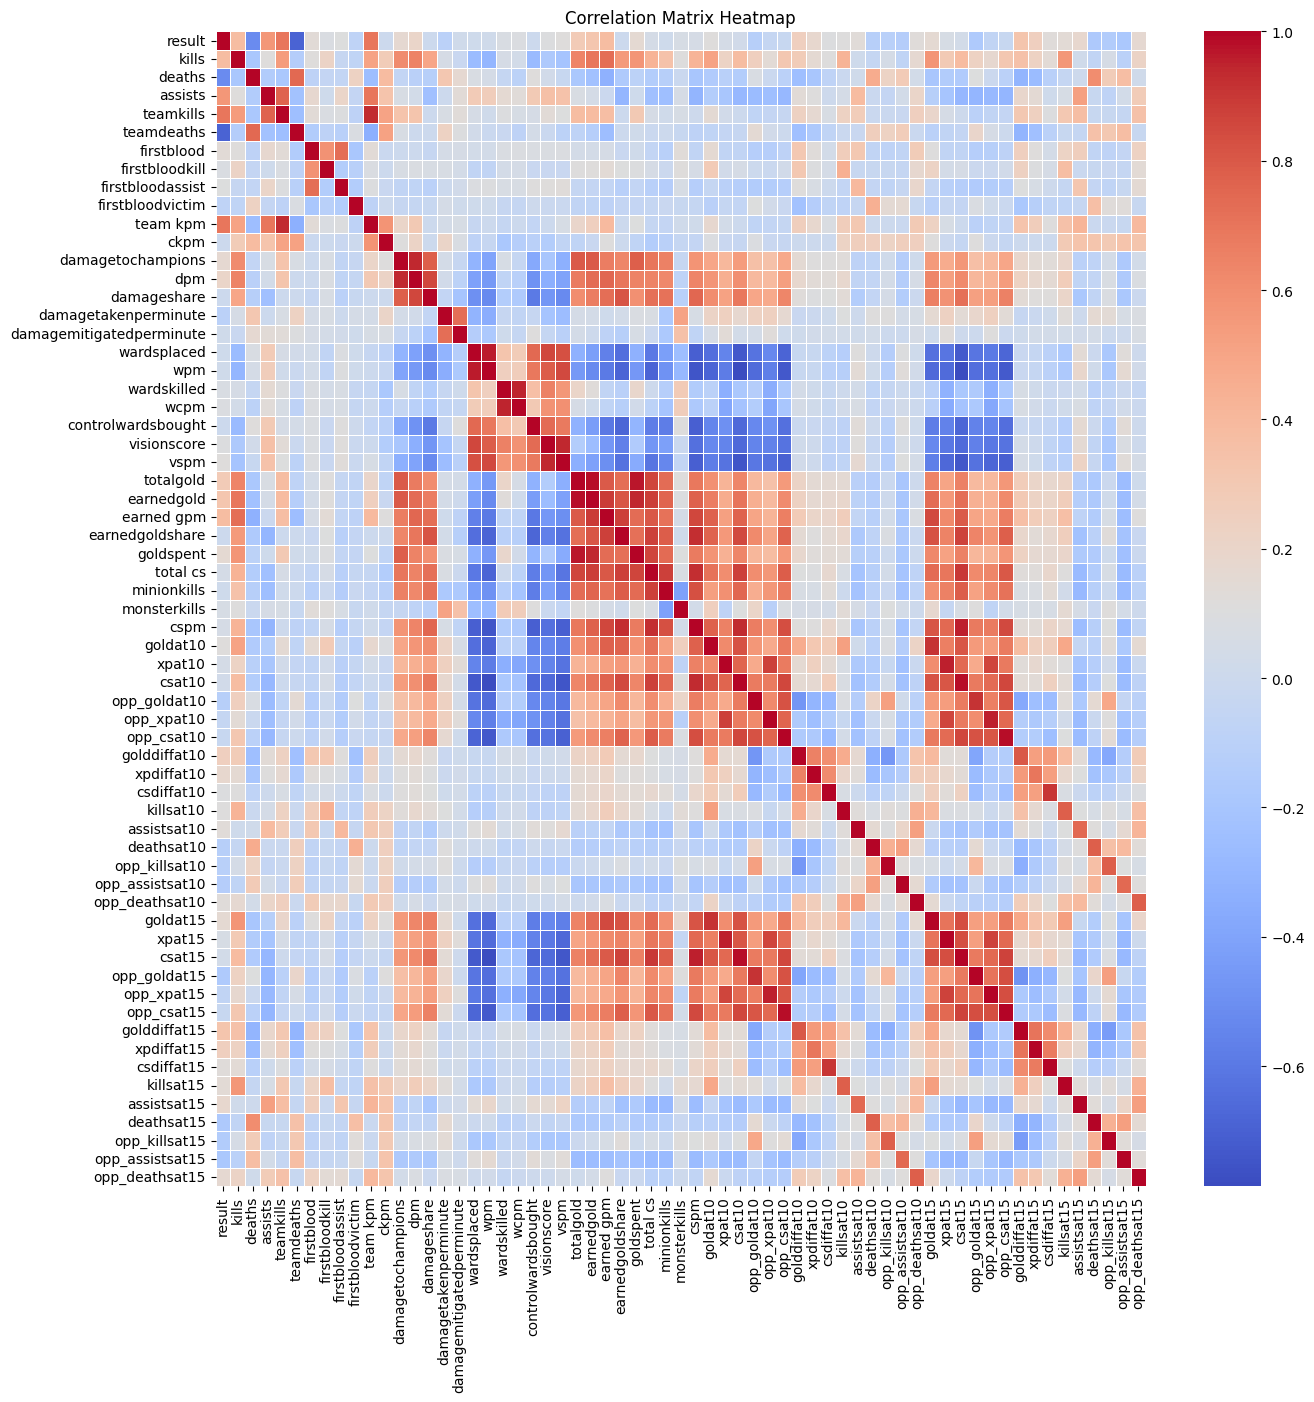

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Showing only with the strong correlation

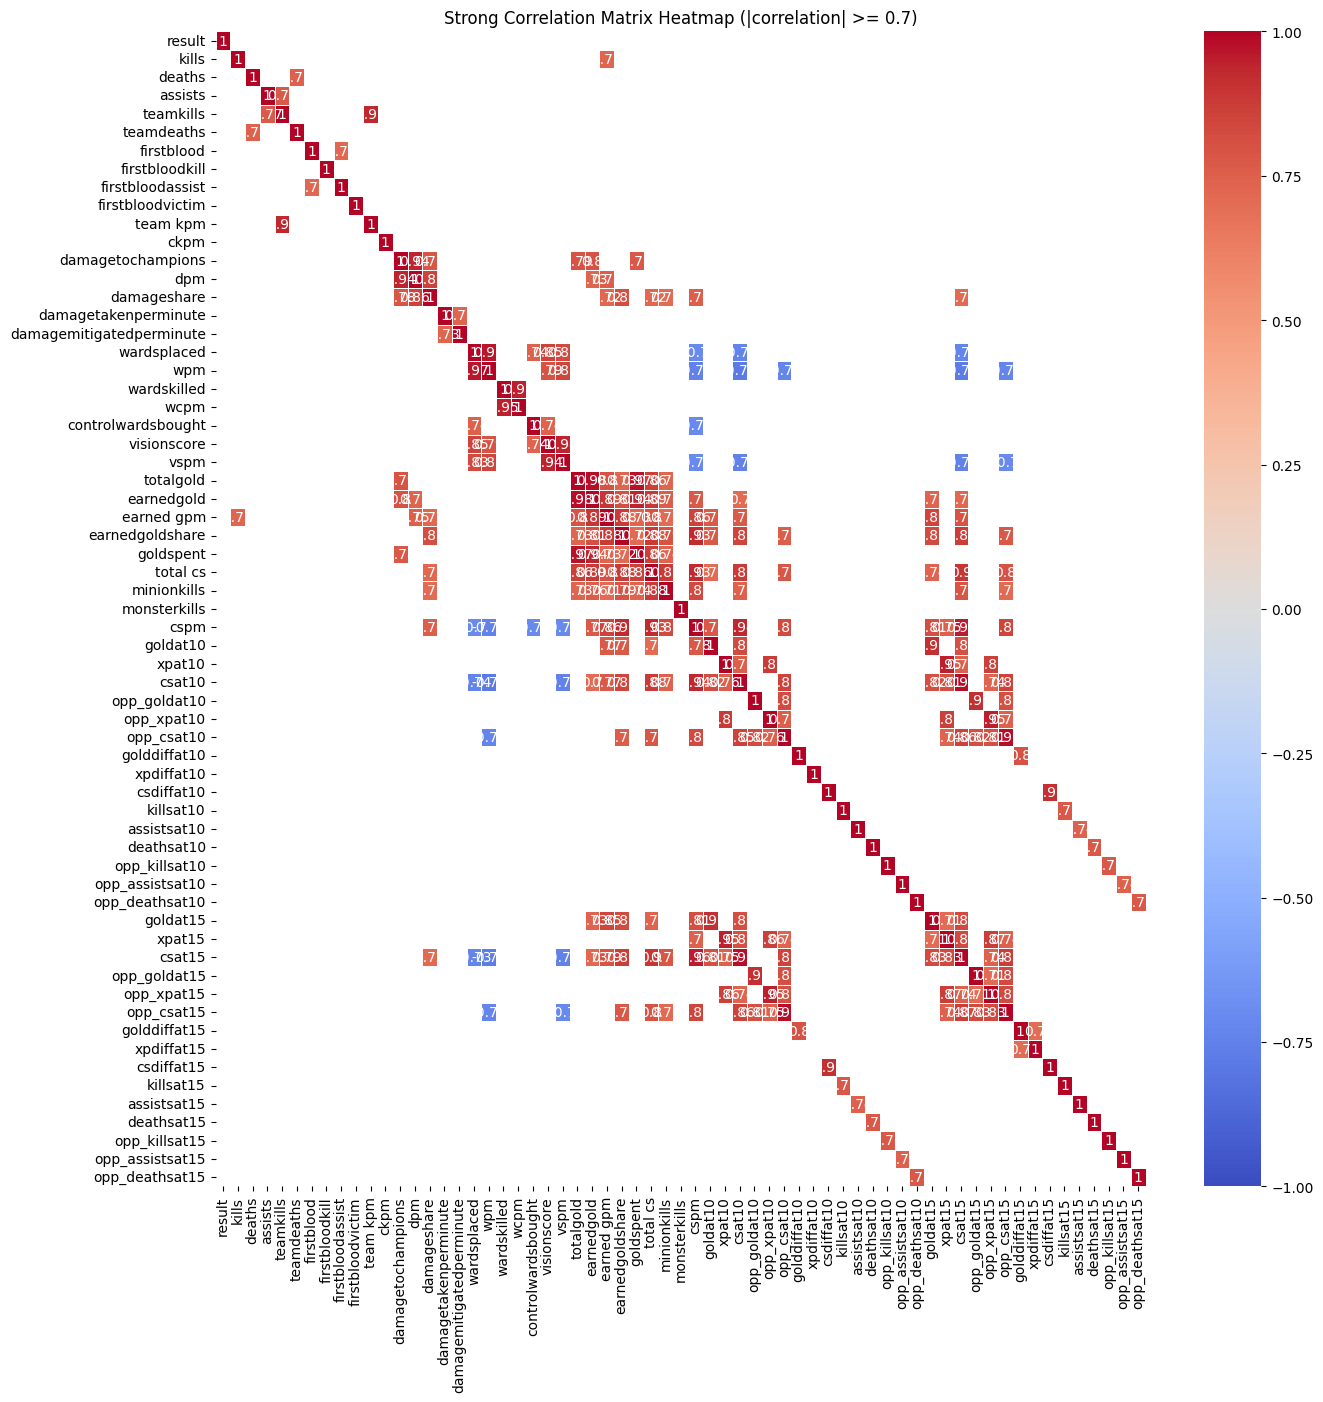

In [ ]:
filtered_corr_matrix = correlation_matrix[(correlation_matrix >= 0.7) | (correlation_matrix <= -0.7)]

plt.figure(figsize=(15, 15))

sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, vmin=-1, vmax=1, center=0)

plt.title('Strong Correlation Matrix Heatmap (|correlation| >= 0.7)')

plt.show()

Getting the column names

In [ ]:
filtered_corr_matrix1 = filtered_corr_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)

In [ ]:
cols_to_exclude = []
for col in filtered_corr_matrix1.columns:
    non_self_corr = filtered_corr_matrix1[col].drop(labels=col)
    if non_self_corr.isna().all():
        cols_to_exclude.append(col)

In [ ]:
filtered_corr_matrix_final = filtered_corr_matrix1.drop(columns=cols_to_exclude, index=cols_to_exclude)

In [ ]:
significant_columns_final = filtered_corr_matrix_final.columns.tolist()

In [ ]:
print("Columns with significant correlations excluding self-correlation only:", significant_columns_final)

Columns with significant correlations excluding self-correlation only: ['kills', 'deaths', 'assists', 'teamkills', 'teamdeaths', 'firstblood', 'firstbloodassist', 'team kpm', 'damagetochampions', 'dpm', 'damageshare', 'damagetakenperminute', 'damagemitigatedperminute', 'wardsplaced', 'wpm', 'wardskilled', 'wcpm', 'controlwardsbought', 'visionscore', 'vspm', 'totalgold', 'earnedgold', 'earned gpm', 'earnedgoldshare', 'goldspent', 'total cs', 'minionkills', 'cspm', 'goldat10', 'xpat10', 'csat10', 'opp_goldat10', 'opp_xpat10', 'opp_csat10', 'golddiffat10', 'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'opp_killsat10', 'opp_assistsat10', 'opp_deathsat10', 'goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15']


Further deleting these rows because of minimal impact and redundency compare to other columns in game.

['teamkills', 'teamdeaths', 'firstblood', 'firstbloodassist', 'team kpm',  'damagetakenperminute', 'damagemitigatedperminute', 'wardskilled', 'wcpm',     'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'opp_killsat10', 'opp_assistsat10', 'opp_deathsat10', 'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15']


In [ ]:
columns_to_keep = [
    'result', 'kills', 'deaths', 'assists', 'damagetochampions', 'dpm', 'damageshare',
    'wardsplaced', 'wpm', 'controlwardsbought', 'visionscore', 'vspm', 'totalgold',
    'earnedgold', 'earned gpm', 'earnedgoldshare', 'goldspent', 'total cs',
    'minionkills', 'cspm', 'goldat10', 'xpat10', 'csat10', 'opp_goldat10',
    'opp_xpat10', 'opp_csat10', 'golddiffat10', 'goldat15', 'xpat15', 'csat15',
    'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15'
]

In [ ]:
clean_df = df[columns_to_keep]

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108020 entries, 0 to 108019
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   result              108020 non-null  int64  
 1   kills               108020 non-null  int64  
 2   deaths              108020 non-null  int64  
 3   assists             108020 non-null  int64  
 4   damagetochampions   108020 non-null  float64
 5   dpm                 108020 non-null  float64
 6   damageshare         108020 non-null  float64
 7   wardsplaced         108020 non-null  float64
 8   wpm                 108020 non-null  float64
 9   controlwardsbought  108020 non-null  float64
 10  visionscore         108020 non-null  float64
 11  vspm                108020 non-null  float64
 12  totalgold           108020 non-null  int64  
 13  earnedgold          108020 non-null  float64
 14  earned gpm          108020 non-null  float64
 15  earnedgoldshare     108020 non-nul

Save this DF for Approach 1

In [ ]:
clean_df.to_csv('Final players df 2.csv', index=False)

Lets check the Spearman COrrelation matrix as well


In [ ]:
spearman_corr = df.corr(method='spearman')

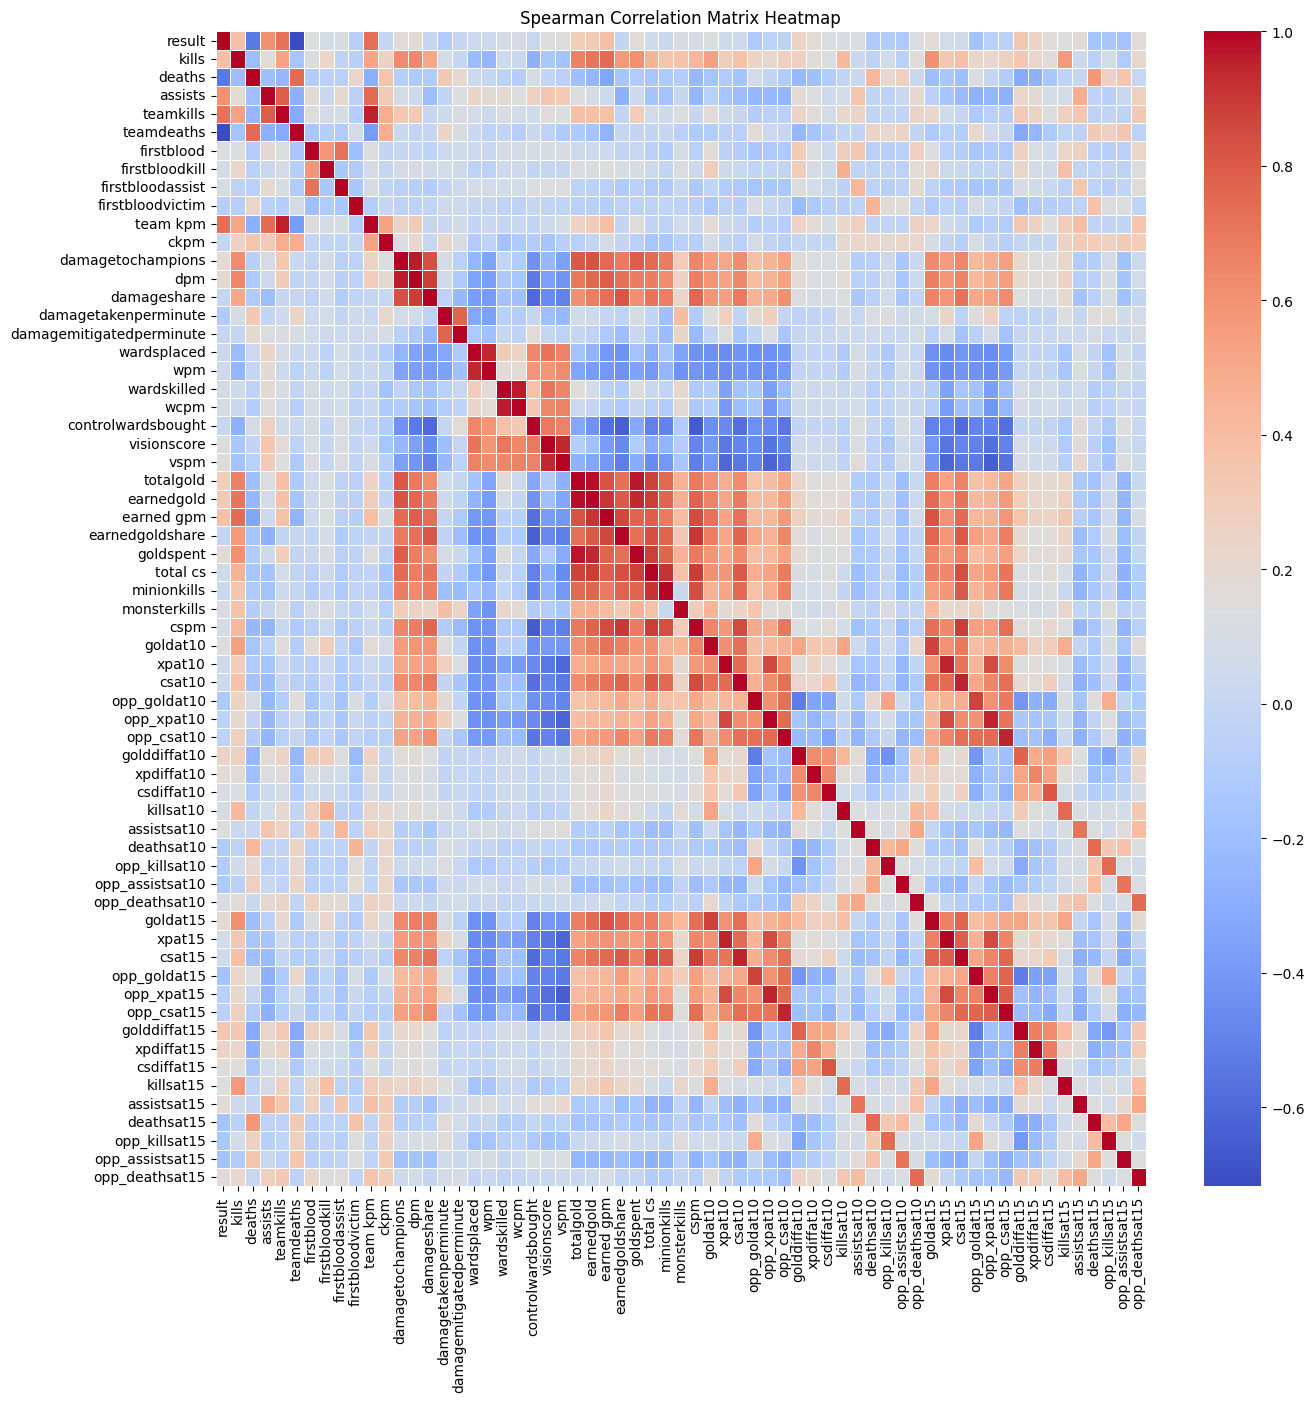

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(spearman_corr, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

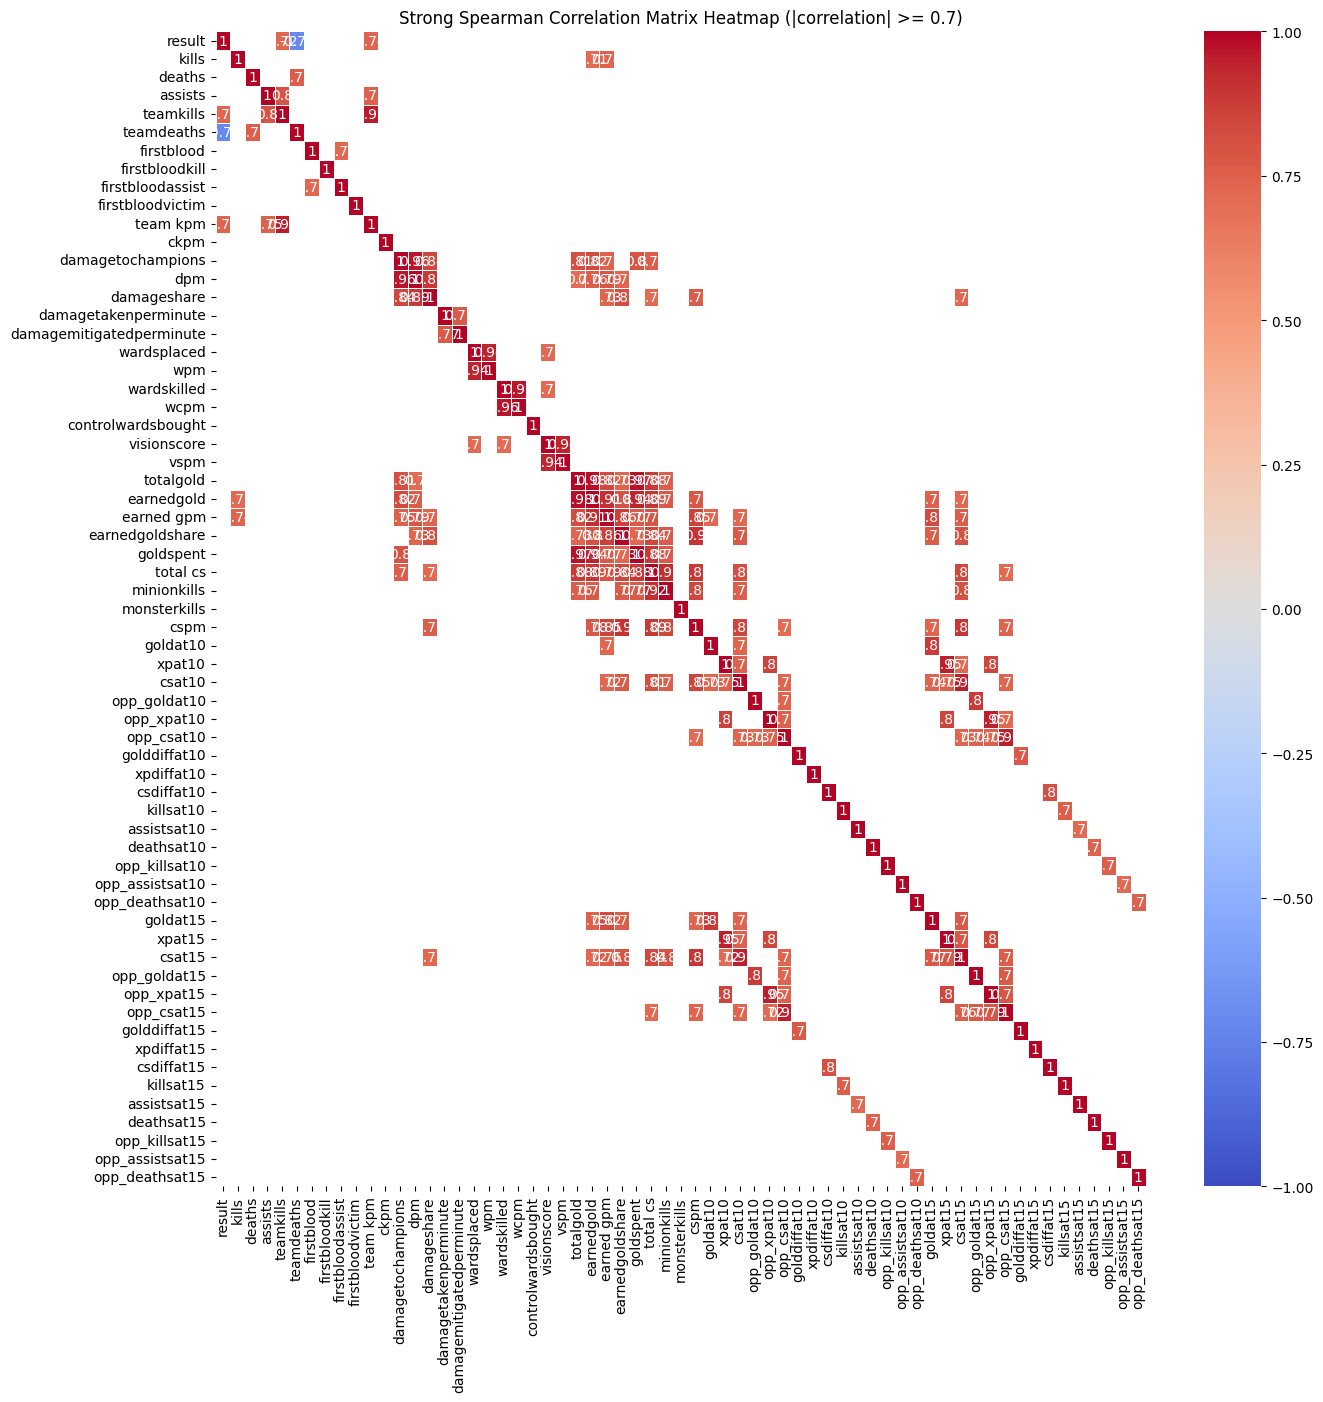

In [ ]:
filtered_spear_matrix = spearman_corr[(spearman_corr >= 0.7) | (spearman_corr <= -0.7)]

plt.figure(figsize=(15, 15))

sns.heatmap(filtered_spear_matrix, annot=True, cmap='coolwarm', linewidths=.5, vmin=-1, vmax=1, center=0)

plt.title('Strong Spearman Correlation Matrix Heatmap (|correlation| >= 0.7)')

plt.show()

Getting the columns names

In [ ]:
filtered_spear_matrix1 = filtered_spear_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)

In [ ]:
cols_to_exclude = []
for col in filtered_spear_matrix1.columns:
    non_self_corr = filtered_spear_matrix1[col].drop(labels=col)
    if non_self_corr.isna().all():
        cols_to_exclude.append(col)

In [ ]:
filtered_spear_matrix_final = filtered_spear_matrix1.drop(columns=cols_to_exclude, index=cols_to_exclude)

In [ ]:
significant_spearcolumns_final = filtered_spear_matrix_final.columns.tolist()

In [ ]:
print("Columns with significant correlations excluding self-correlation only:", significant_spearcolumns_final)

Columns with significant correlations excluding self-correlation only: ['result', 'kills', 'deaths', 'assists', 'teamkills', 'teamdeaths', 'firstblood', 'firstbloodassist', 'team kpm', 'damagetochampions', 'dpm', 'damageshare', 'damagetakenperminute', 'damagemitigatedperminute', 'wardsplaced', 'wpm', 'wardskilled', 'wcpm', 'visionscore', 'vspm', 'totalgold', 'earnedgold', 'earned gpm', 'earnedgoldshare', 'goldspent', 'total cs', 'minionkills', 'cspm', 'goldat10', 'xpat10', 'csat10', 'opp_goldat10', 'opp_xpat10', 'opp_csat10', 'golddiffat10', 'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'opp_killsat10', 'opp_assistsat10', 'opp_deathsat10', 'goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15']


As wee can see, Our selection is reduced than both the Correlation Matrix

Point to note, Spearman correlation has given us couple of extra columns that pearson correlation didnt gave us. We will try those columns on Approach 3

##Random Forest Feature Selection

we will try to further narrow down the columns for Approach 2

In [ ]:
X = clean_df.drop(columns=['result'])
y = clean_df['result']

using a sample size dataset for faster result

In [ ]:
sampled_df = clean_df.sample(frac=0.1, random_state=42)

In [ ]:
X_sampled = sampled_df.drop(columns=['result'])
y_sampled = sampled_df['result']

In [ ]:
model_sampled = RandomForestClassifier(random_state=42)

In [ ]:
model_sampled.fit(X_sampled, y_sampled)

RandomForestClassifier(random_state=42)

In [ ]:
selector_sampled = SelectFromModel(model_sampled, prefit=True)

In [ ]:
selected_features_sampled = X_sampled.columns[selector_sampled.get_support()].tolist()

In [ ]:
selected_features_sampled

['kills',
 'deaths',
 'assists',
 'earnedgold',
 'earned gpm',
 'earnedgoldshare',
 'golddiffat15']

Columns after Random Forest Feature Selection:

['kills',

 'deaths',

 'assists',

 'earnedgold',

 'earned gpm',

 'earnedgoldshare',

 'golddiffat15']

Our dataset suggest 'kills', 'deaths', and 'assists' are much more significant than other columns. Sometimes the result may be biased because of these three columns (They are the most influencial matrics in games). SO runnng the Random Forest Feature Selection again without these three columns.

In [ ]:
excluded_features = ['kills', 'deaths', 'assists']
X_sampled_reduced = X_sampled.drop(columns=excluded_features)

In [ ]:
model_sampled_reduced = RandomForestClassifier(random_state=42)

In [ ]:
model_sampled_reduced.fit(X_sampled_reduced, y_sampled)

RandomForestClassifier(random_state=42)

In [ ]:
selector_sampled_reduced = SelectFromModel(model_sampled_reduced, prefit=True)
selected_features_sampled_reduced = X_sampled_reduced.columns[selector_sampled_reduced.get_support()].tolist()

In [ ]:
selected_features_sampled_reduced

['totalgold',
 'earnedgold',
 'earned gpm',
 'earnedgoldshare',
 'goldspent',
 'golddiffat15']

Columns after Further Feature Selection:

['totalgold',

 'earnedgold',

 'earned gpm',

 'earnedgoldshare',

 'goldspent',

 'golddiffat15']

We will use these columns for Binary Classification Approach 2